- 머신러닝 알고리즘은 모델의 구조가 어느정도 고정되어 있음
    - 좋은 성능을 내기 위해서는 매개변수를 조정하고 훈련하는 과정을 반복
 
- 딥러닝은 구조를 직접 설계해야함
    - 좋은 성능을 내기 위해 다룰 수 있는 다양한 개념과 도구들을 이해할 필요가 있음

# 손실 곡선

- 케라스의 fit() 메서드는 History 클래스의 객체를 반환
    - History 객체 : 훈련 과정에서 계산한 지표(손실과 정확도값)가 저장되어 있음
    - 이 값을 사용하여 그래프를 그려서 훈련 성과를 확인

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
scaled_train = x_train / 255
scaled_train, scaled_val, y_train, y_val = train_test_split(scaled_train, y_train, test_size = 0.2,
                                                            stratify = y_train, random_state = 26)

In [4]:
# 모델 정의
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.Input(shape = (28, 28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation = "relu"))

    if a_layer:
        model.add(a_layer)

    model.add(keras.layers.Dense(10, activation = "softmax"))
    return model

In [5]:
model = model_fn()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [7]:
history = model.fit(scaled_train, y_train, epochs = 5, batch_size = 32)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.7712 - loss: 0.6646
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.8528 - loss: 0.4014
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - accuracy: 0.8666 - loss: 0.3662
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step - accuracy: 0.8804 - loss: 0.3323
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 625us/step - accuracy: 0.8833 - loss: 0.3160


In [8]:
# history 객체 확인
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


- 기본적으로 손실을 계산하고 compile 에서 accuracy 를 추가하여서 loss 와 accuracy 가 포함됨

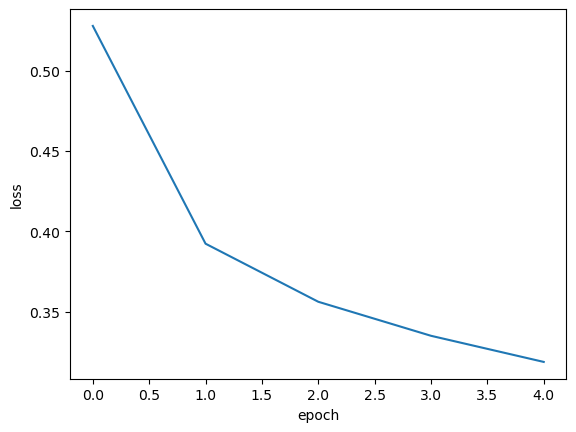

In [9]:
plt.figure()
plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

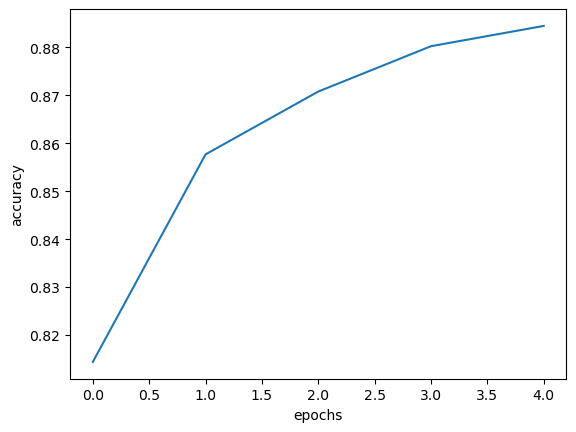

In [10]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [11]:
# epoch를 20으로 늘려서 그래프 확인
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(scaled_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step - accuracy: 0.7679 - loss: 0.6638
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.8582 - loss: 0.3941
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step - accuracy: 0.8723 - loss: 0.3563
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - accuracy: 0.8776 - loss: 0.3375
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.8860 - loss: 0.3178
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - accuracy: 0.8917 - loss: 0.2978
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - accuracy: 0.8954 - loss: 0.2910
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.9007 - loss: 0.2776
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - accuracy: 0.9049 - loss: 0.2705
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step - accuracy: 0.9059 - loss: 0.2645
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.9079 - loss: 0.2606
Epoch 12

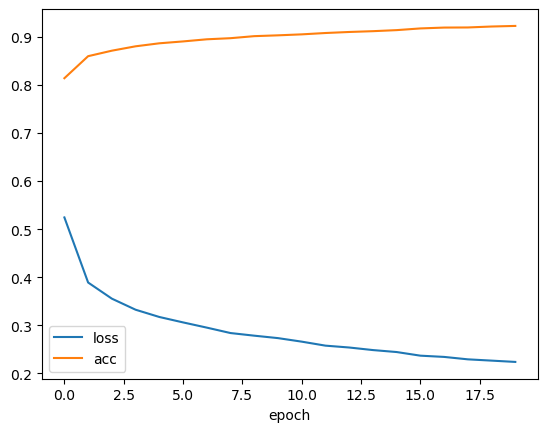

In [12]:
plt.figure()
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["accuracy"], label = "acc")
plt.legend()
plt.xlabel("epoch")
plt.show()

# 검증 손실

- 에포크에 따른 과대적합과 과소적합을 파악하려면 검증 세트에 대한 점수도 확인해야함
- 케라스에서는 fit() 메서드에 검증 데이터를 전달할 수 있음

In [13]:
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val),
                    batch_size = 32)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - accuracy: 0.7626 - loss: 0.6795 - val_accuracy: 0.8467 - val_loss: 0.4197
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - accuracy: 0.8535 - loss: 0.4068 - val_accuracy: 0.8622 - val_loss: 0.3903
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step - accuracy: 0.8697 - loss: 0.3621 - val_accuracy: 0.8666 - val_loss: 0.3765
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.8847 - loss: 0.3286 - val_accuracy: 0.8722 - val_loss: 0.3752
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - accuracy: 0.8878 - loss: 0.3134 - val_accuracy: 0.8809 - val_loss: 0.3488
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - accuracy: 0.8872 - loss: 0.3138 - val_accuracy: 0.8769 - val_loss: 0.3652
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.8932 - loss: 0.2968 - val_accuracy: 0.8871 - val_loss: 0.3510
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - accuracy: 0.9000 -

In [14]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


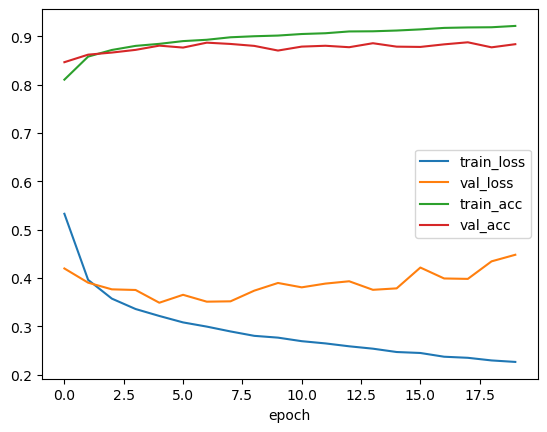

In [15]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

- 훈련 손실은 계속 감소하는데 검증 손실은 감소하다가 상승하여 과대적합 모델이 만들어짐
    - 검증 손실이 상승하는 시점을 가능한한 뒤로 늦출 필요가 있음

In [16]:
# Adam 옵티마이저 선택
model = model_fn()
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val),
                    batch_size = 32)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 912us/step - accuracy: 0.7684 - loss: 0.6843 - val_accuracy: 0.8432 - val_loss: 0.4444
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - accuracy: 0.8557 - loss: 0.4097 - val_accuracy: 0.8557 - val_loss: 0.3918
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - accuracy: 0.8705 - loss: 0.3620 - val_accuracy: 0.8727 - val_loss: 0.3514
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accuracy: 0.8832 - loss: 0.3215 - val_accuracy: 0.8755 - val_loss: 0.3379
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - accuracy: 0.8865 - loss: 0.3130 - val_accuracy: 0.8794 - val_loss: 0.3336
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - accuracy: 0.8908 - loss: 0.2937 - val_accuracy: 0.8803 - val_loss: 0.3294
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - accuracy: 0.8956 - loss: 0.2799 - val_accuracy: 0.8673 - val_loss: 0.3720
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.9005 -

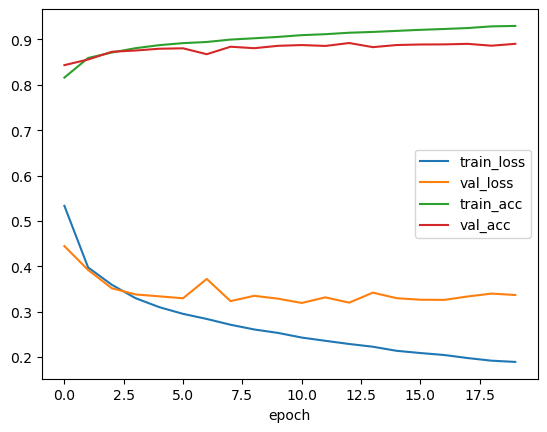

In [17]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

- RMSprop 을 사용할 때보다 검증 손실 그래프의 감소 추세가 길게 이어지고 있어 Adam 옵티마이저가 이 데이터셋에 잘 맞는 것으로 보임

# 드롭아웃(dropoput)

<img src = "./image/dropout.png" width = "600" height = "600">

- 훈련 과정에서 층의 일부 유닛을 랜덤하게 끄는 것으로(출력을 0으로 만드는 것으로) 과대적합을 방지
    - 특정 유닛에 과대하게 의존하는 것을 줄일 수 있음
 
    - 일부 유닛의 출력이 없을 수 있다는 것을 감안하여 학습하게 됨
        - 모든 입력값에 대해 충분한 주의를 기울이는 방향으로 학습
     
- 드롭아웃은 케라스에서 Dropout 클래스로 제공

- 특정 층 뒤에 드롭아웃을 두어 해당 층의 출력을 랜덤하게 0으로 만듦

- Flatten 과 마찬가지로 층처럼 사용되지만 훈련되는 모델 파라미터가 없음